In [1]:
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
# Verificar si CUDA está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


In [3]:
# Preprocesamiento
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

In [4]:
# Cargar dataset de entrenamiento
images_dir = 'arcgis-survey-images'
train_dataset = datasets.ImageFolder(root=images_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [5]:
# Clases
class_names = train_dataset.classes

In [6]:
# Mostrar la distribución de clases
def plot_class_distribution(dataset, class_names):
    count_dict = {class_name: 0 for class_name in class_names}
    for _, labels in dataset:
        for label in labels:
            count_dict[class_names[label]] += 1
    
    plt.figure(figsize=(10, 6))
    plt.bar(count_dict.keys(), count_dict.values())
    plt.xlabel('Clase')
    plt.ylabel('Cantidad de imágenes')
    plt.title('Distribución de imágenes por clase')
    plt.show()

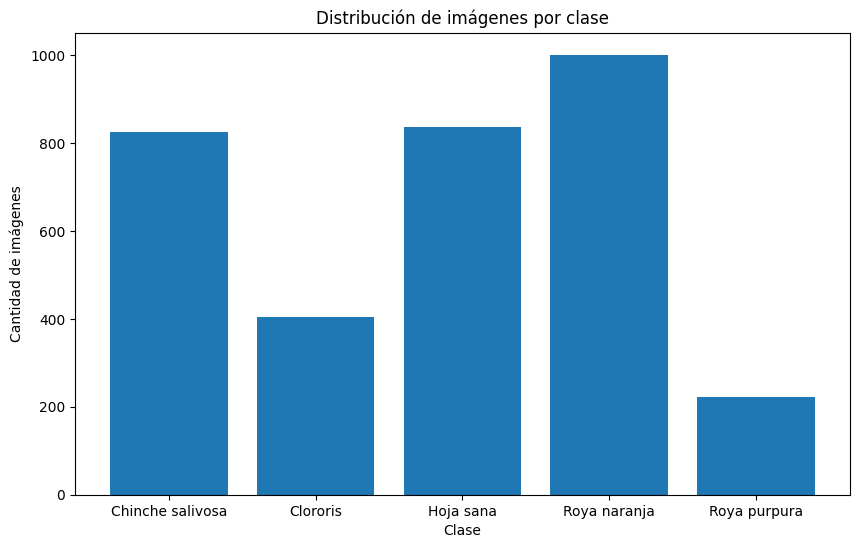

In [7]:
plot_class_distribution(train_loader, class_names)

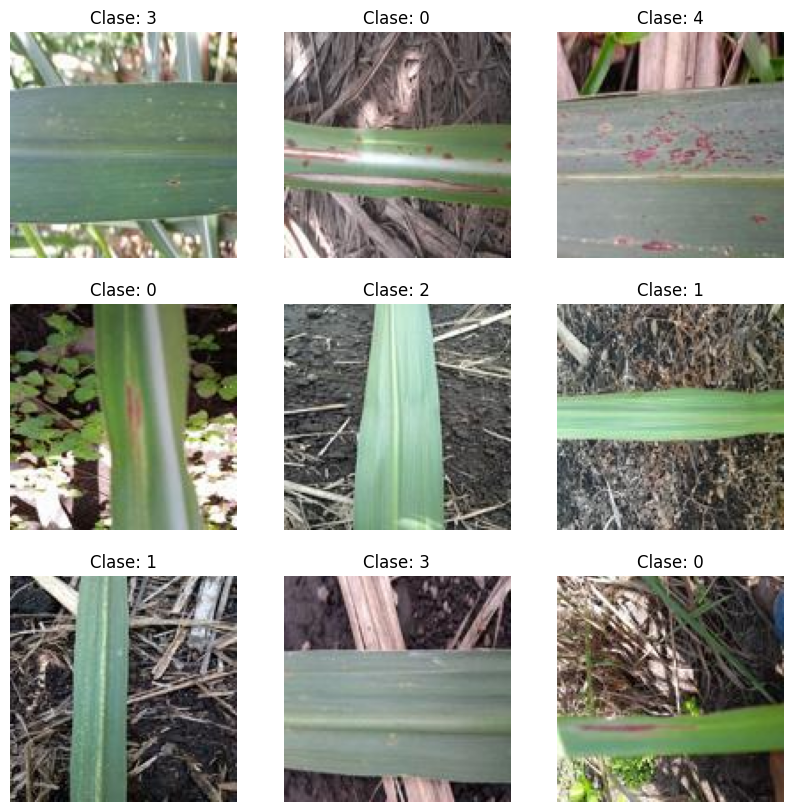

In [10]:

# Mostrar imágenes con filtro Sobel aplicado
def visualize_sobel_samples(dataset):
    data_iter = iter(dataset)
    images, labels = next(data_iter)  # Cambiado a next(data_iter)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].permute(1, 2, 0).squeeze(), cmap='gray')
        plt.title(f"Clase: {labels[i]}")
        plt.axis("off")

visualize_sobel_samples(train_loader)

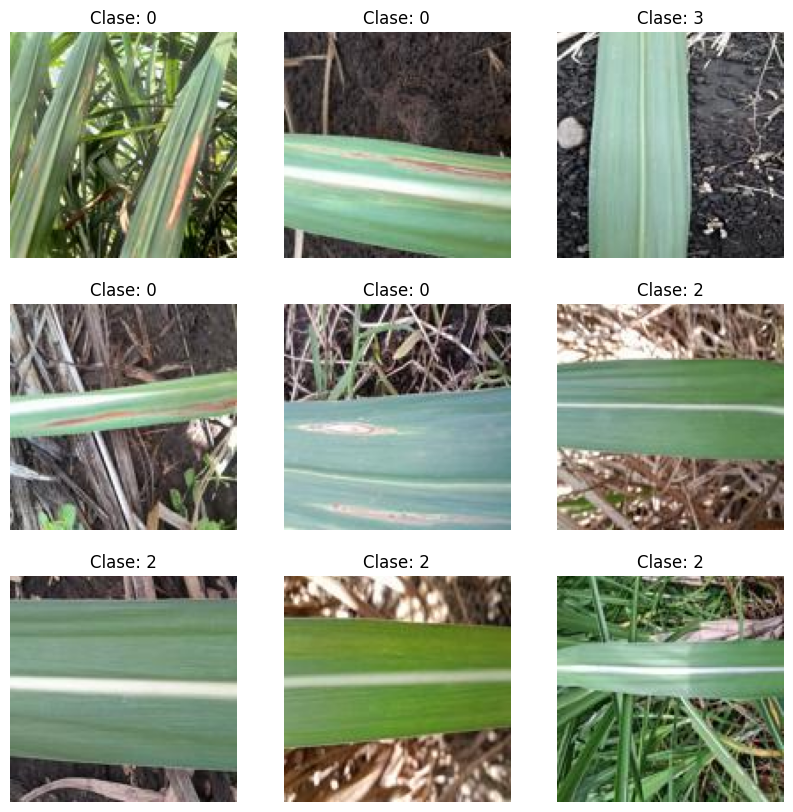

In [12]:
visualize_sobel_samples(train_loader)